## 실습1
환경설정

### 실습 1.1. 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 실습 1.2. MyDrive에 KIRD 폴더 업로드 확인

In [ ]:
!ls drive/MyDrive/KIRD/실습2

BLD00273_PS3_K3A_NIA0276.png  BLD00274_PS3_K3A_NIA0276.kml
BLD00273_PS4_K3A_NIA0276.tif


In [ ]:
! cp -r drive/MyDrive/KIRD/실습2/* .

In [ ]:
!ls

BLD00273_PS3_K3A_NIA0276.png  drive
BLD00273_PS4_K3A_NIA0276.tif  gk2a_ami_le1b_ir087_ea020lc_202210272350.nc
BLD00274_PS3_K3A_NIA0276.kml  sample_data


## 실습2

아래 항목을 채워주세요.
1. size = ***1024, 1024***
2. crs = ***wgs84***
3. epsg = ***4326***
4. geoTransform = **[ 346268.0013469600235112, 0.55, 0.0, 3317646.0769356698729098, 0.0, -0.55 ]**
5. longitude, latitude = ***(29.9800762, 31.40648)***
6. gsd (hint: Pixel Size) = ***0.55***
7. bit (hint: Type) = ***16***
8. band (How many? What kind?) = *4*

### 실습 2.1. gdal 설치

In [ ]:
!sudo apt-get update
!sudo apt-get install gdal-bin

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [993 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [

실습 2.2. gdalinfo 로 metadata 확인

In [ ]:
!gdalinfo BLD00273_PS4_K3A_NIA0276.tif

Driver: GTiff/GeoTIFF
Files: BLD00273_PS4_K3A_NIA0276.tif
Size is 1024, 1024
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 36N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 36N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",33,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],

In [ ]:
!gdalinfo --help

Usage: gdalinfo [--help-general] [-json] [-mm] [-stats | -approx_stats] [-hist] [-nogcp] [-nomd]
                [-norat] [-noct] [-nofl] [-checksum] [-proj4]
                [-listmdd] [-mdd domain|`all`] [-wkt_format WKT1|WKT2|...]*
                [-sd subdataset] [-oo NAME=VALUE]* [-if format]* datasetname


In [ ]:
!gdalinfo -json -proj4 BLD00273_PS4_K3A_NIA0276.tif |grep -i -A 7 "geoTransform\|Polygon"

  "geoTransform":[
    346268.0013469600235112,
    0.55,
    0.0,
    3317646.0769356698729098,
    0.0,
    -0.55
  ],
--
    "type":"Polygon",
    "coordinates":[
      [
        [
          31.40648,
          29.9800762
        ],
        [


## 실습3

아래 항목을 채워주세요.
1.   test01 = ***대전 KIRD***
2.   test02 = ***플로리다***



## 실습4

### 실습 4.1. aihub에서 데이터 다운로드하기
https://aihub.or.kr/login/login.do?currMenu=136&topMenu=106

### 실습 4.2. 실습2 폴더에 옮긴 후 가상스토리지로 파일 복사

In [ ]:
! cp -r drive/MyDrive/KIRD/EO/* .

In [ ]:
! ls

### 실습 4.3. gdalinfo로 메타데이터 확인하기

In [ ]:
!gdalinfo -json -proj4 {영상 이름}

## 실습5

### 실습 5.1. Api허브 회원가입하기

https://apihub.kma.go.kr/

### 실습 5.2. authkey 입력하기

In [ ]:
typ ='bin'
lvl ='l1b'
are ='ea'
chn ='ir087'
tm ='202210272350'
authKey = 'O1ibBVXdR7yYmwVV3Ue8oA'
# authKey ='aiuthkey를 넣어주세요'

### 실습 5.3. API로 데이터 다운로드

In [ ]:
import requests

# API 엔드포인트 지정
url = f'https://apihub.kma.go.kr/api/typ01/url/sat_file_down2.php?typ={typ}&lvl={lvl}&are={are}&chn={chn}&tm={tm}&authKey={authKey}'

# API 요청
with open("gk2a_ami_le1b_ir087_ea020lc_202210272350.nc", "wb") as file:  
     
    # get request
    response = requests.get(url)     
    
    # 파일 쓰기          
    file.write(response.content)   


In [ ]:
! ls

gk2a_ami_le1b_ir087_ea020lc_202210272350.nc  sample_data


## 실습6
PYTHON 으로 시각화

### 실습 6.1. NC 파일 시각화

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# NC 파일 로드
data = xr.open_dataset('gk2a_ami_le1b_ir087_ea020lc_202210272350.nc')

# 변수 선택
variable = data['image_pixel_values']

# 그래프 창 크기 조정
plt.figure(figsize=(20, 16))

# 2D 이미지로 표시
plt.imshow(variable, cmap='jet')

# 컬러바 표시
plt.colorbar()

# 그래프 출력
plt.show()


### 실습 6.2. TIF 파일 시각화

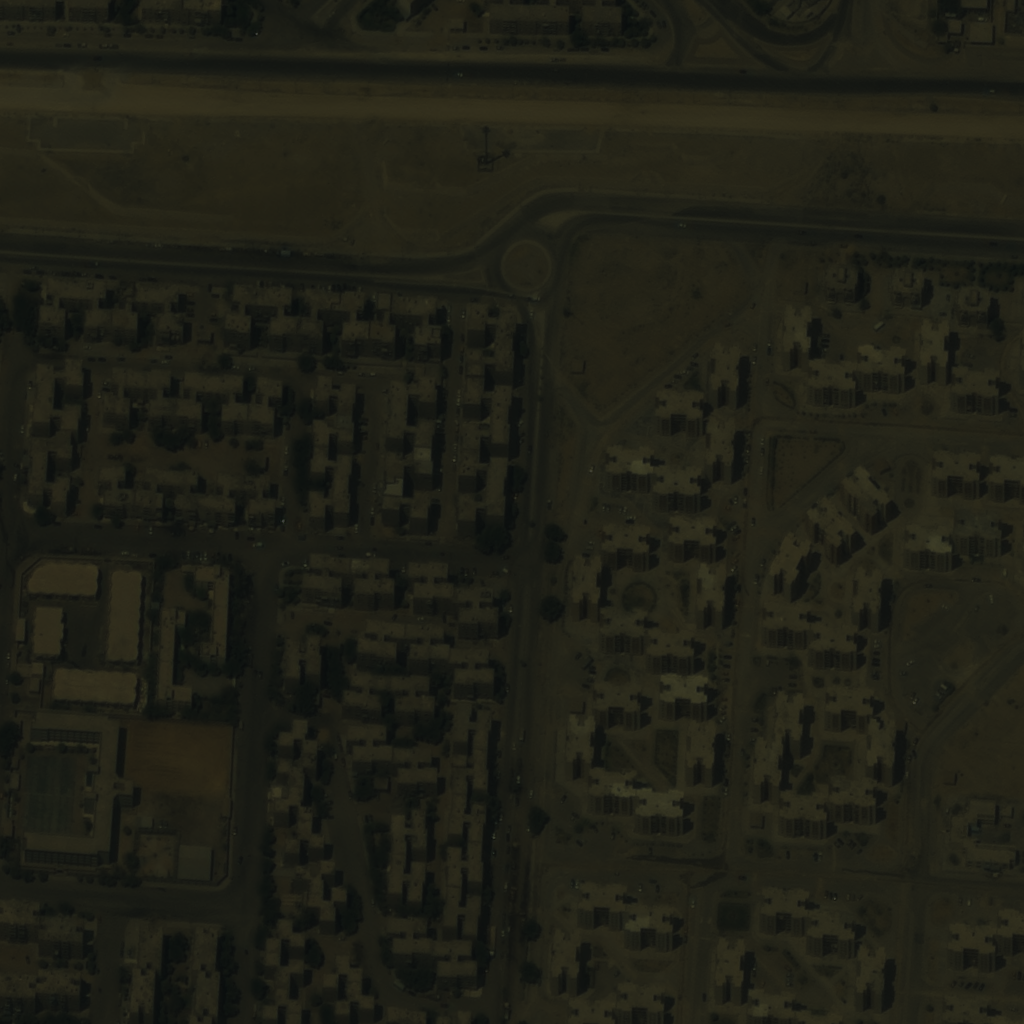

In [ ]:
from PIL import Image

# 이미지 열기
image = Image.open('BLD00273_PS4_K3A_NIA0276.tif')

# 이미지 보기
image.show()

## 실습7

QGIS, SNAP 시각화